In [1]:
import pandas as pd
import sklearn as skl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, recall_score,confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
filenames = [f'../data/data_20{x}.csv' for x in range(16,23)]
df = pd.concat([pd.read_csv(x) for x in filenames ])
df.drop(columns=['0','Unnamed: 0','k_window'],axis =1,inplace=True)
df.dropna(inplace=True)
Y = df.k_index_target
df.drop(columns=['k_index_target'],axis=1,inplace=True)
Y = Y.apply(lambda x: 0 if round(x) <=4 else round(x)-4 )

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [20]:
RC = RandomForestClassifier(verbose= 2,n_jobs=-1,n_estimators=60,max_depth=10)
RC.fit(df,Y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 60
building tree 2 of 60
building tree 3 of 60
building tree 4 of 60
building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60
building tree 10 of 60
building tree 11 of 60building tree 12 of 60

building tree 13 of 60
building tree 14 of 60
building tree 15 of 60
building tree 16 of 60
building tree 17 of 60
building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60
building tree 29 of 60


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.0min


building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 60
building tree 45 of 60
building tree 46 of 60
building tree 47 of 60
building tree 48 of 60
building tree 49 of 60
building tree 50 of 60
building tree 51 of 60
building tree 52 of 60
building tree 53 of 60
building tree 54 of 60
building tree 55 of 60
building tree 56 of 60
building tree 57 of 60
building tree 58 of 60
building tree 59 of 60
building tree 60 of 60


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.7min finished


RandomForestClassifier(max_depth=10, n_estimators=60, n_jobs=-1, verbose=2)

In [9]:
from joblib import dump, load
dump(RC, 'filename.joblib') 

['filename.joblib']

In [21]:
Test = pd.read_csv('../data/data_2023.csv')
Test.drop(columns=['0','Unnamed: 0','k_window'],axis =1,inplace=True)
Test.dropna(inplace=True)
Y_Test = Test.k_index_target
Test.drop(columns=['k_index_target'],axis=1,inplace=True)
Y_Test = Y_Test.apply(lambda x: 0 if round(x) <=4 else round(x)-4 )


In [22]:
Test

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,k_index_current
0,-2.70274,4.51236,-1.458060,43.044500,0.231726,0.231726,0.818269,22.60750,0.231726,0.231726,...,322.576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.333
1,-2.82748,4.69308,-0.949090,23.756600,0.231726,0.315117,1.063280,11.22800,0.231726,0.355214,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.333
2,-1.87608,4.48063,-2.588770,61.344500,0.231726,0.231726,11.327000,19.76130,0.231726,0.231726,...,242.390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.333
3,-2.71541,4.74902,-0.324706,23.489500,0.231726,0.460690,3.708190,8.67441,0.231726,2.614280,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.333
4,-2.93342,4.77895,-0.047584,26.517100,0.231726,0.231726,0.231726,10.46320,0.231726,0.231726,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175675,4.33665,2.80127,0.954633,1.004790,0.231726,4.647570,0.626576,3.54595,0.231726,1.795390,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.667
175676,4.66778,2.10582,1.260660,0.781621,0.231726,5.972220,0.360648,3.39143,0.231726,0.506513,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.667
175677,4.28322,3.02154,0.927773,0.854185,0.231726,8.104540,2.025800,4.22000,0.231726,2.344650,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.667
175678,4.31376,2.67727,1.723270,0.801559,0.231726,12.762100,2.818550,4.82242,0.301864,0.355221,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.667


In [23]:
def test_model(model,x_test,y_test,softmax= False):
    if softmax:
            pred = model.predict(x_test,verbose = 0)
            pred = np.argmax(pred,axis =1)
            pred = np.reshape(pred,newshape=pred.shape[0])
    else:
        pred = model.predict(x_test)
        pred = pd.Series(pred)
        
    print(f"accuracy : {accuracy_score(y_test,pred) }, ballanced accuracy: {balanced_accuracy_score(y_test,pred)},recal {recall_score(y_test,pred,average='macro')} ")
    plt.figure(figsize = (20,20))
    sns.heatmap(confusion_matrix(y_test,pred,normalize='true'),annot=True,annot_kws={'fontsize':20})

In [12]:
df

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,k_index_current
0,6.83609,-3.37934,-12.920500,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1,6.76732,-3.30194,-12.996700,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2,6.39107,-2.61173,-13.327100,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
3,6.44897,-2.61525,-13.329900,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,6.58758,-2.73082,-13.236100,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,-1.95967,4.95845,-1.202990,44.4151,0.231726,0.231726,5.561450,16.87790,0.231726,0.231726,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
525596,-1.82694,4.65083,0.351759,38.3516,0.231726,0.231726,17.396800,12.84820,0.231726,0.428618,...,266.921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
525597,-3.77304,3.87694,0.440392,20.2907,0.231726,0.246122,0.885469,9.77093,0.231726,0.285326,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
525598,-3.18466,4.43666,1.084170,54.5463,0.231726,0.678061,1.230790,26.98440,0.231726,3.211080,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [8]:
Y_Test.value_counts()

k_index_target
0    167816
1      2699
2      1980
3      1620
4       540
Name: count, dtype: int64

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  60 out of  60 | elapsed:    0.3s finished


accuracy : 0.9589247373393261, ballanced accuracy: 0.20331914982380797,recal 0.20331914982380797 


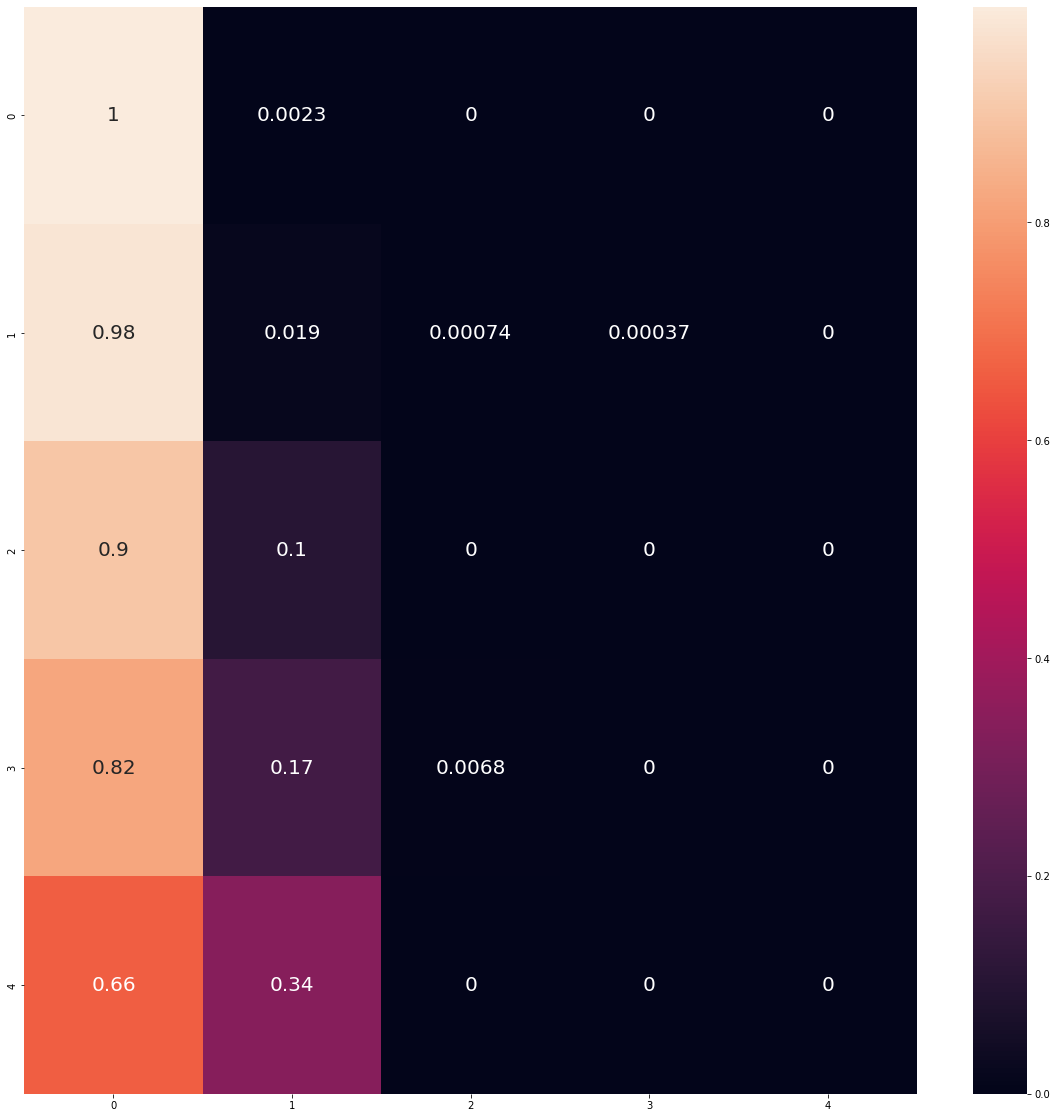

In [24]:
test_model(RC,Test,Y_Test)

In [173]:
Y_Test = Y_Test.apply(lambda x: round(x))
Y_ = Y.apply(lambda x: round(x))

In [165]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, recall_score,confusion_matrix

import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
import sys
import numpy as np
import random
import pathlib
from tensorflow.keras import layers
import numpy as np
import seaborn as sns

In [166]:
df.shape

(3085343, 54)

In [181]:
df.shape

(3085343, 54)

In [186]:
X_train = df.iloc[:round(df.shape[0]/2),:]
y_train = Y.iloc[:round(df.shape[0]/2)]
X_val = df.iloc[round(df.shape[0]/2)+1:,:]
y_val = Y.iloc[round(df.shape[0]/2)+1:]

In [192]:
kernel_regularizer = regularizers.l2(1e-5)
bias_regularizer = regularizers.l2(1e-5)
model = tf.keras.Sequential()
tf.keras.layers.Input(df.shape[1]),
model.add(tf.keras.layers.Dense(256, activation = 'relu',
                kernel_regularizer=kernel_regularizer,
                bias_regularizer=bias_regularizer))
model.add(tf.keras.layers.Dense(256, activation = 'relu',
                kernel_regularizer=kernel_regularizer,
                bias_regularizer=bias_regularizer))
model.add(tf.keras.layers.Dense(64, activation = 'relu',
                kernel_regularizer=kernel_regularizer,
                bias_regularizer=bias_regularizer))

model.add(tf.keras.layers.Dense(9, activation = 'softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [194]:
h = model.fit(X_train, y_train, batch_size=256, epochs=50, validation_data=(X_val, y_val), 
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True,start_from_epoch=5)],verbose =1)

Epoch 1/50
6027/6027 [==============================] - 24s 4ms/step - loss: 0.9614 - accuracy: 0.1896 - val_loss: 1.3441 - val_accuracy: 0.1461
Epoch 2/50
6027/6027 [==============================] - 25s 4ms/step - loss: 0.9500 - accuracy: 0.1923 - val_loss: 1.4148 - val_accuracy: 0.1349
Epoch 3/50
6027/6027 [==============================] - 25s 4ms/step - loss: 0.9408 - accuracy: 0.1942 - val_loss: 1.4283 - val_accuracy: 0.1450
Epoch 4/50
6027/6027 [==============================] - 26s 4ms/step - loss: 0.9313 - accuracy: 0.1967 - val_loss: 1.5610 - val_accuracy: 0.1263
Epoch 5/50
6027/6027 [==============================] - 26s 4ms/step - loss: 0.9233 - accuracy: 0.1983 - val_loss: 1.5083 - val_accuracy: 0.1485
Epoch 6/50
6027/6027 [==============================] - 26s 4ms/step - loss: 0.9171 - accuracy: 0.2003 - val_loss: 1.5314 - val_accuracy: 0.1498
Epoch 7/50
6027/6027 [==============================] - 26s 4ms/step - loss: 0.9097 - accuracy: 0.2018 - val_loss: 1.5247 - val_ac

accuracy : 0.2793564455641121, ballanced accuracy: 0.18765398194884186,recal 0.18765398194884186 


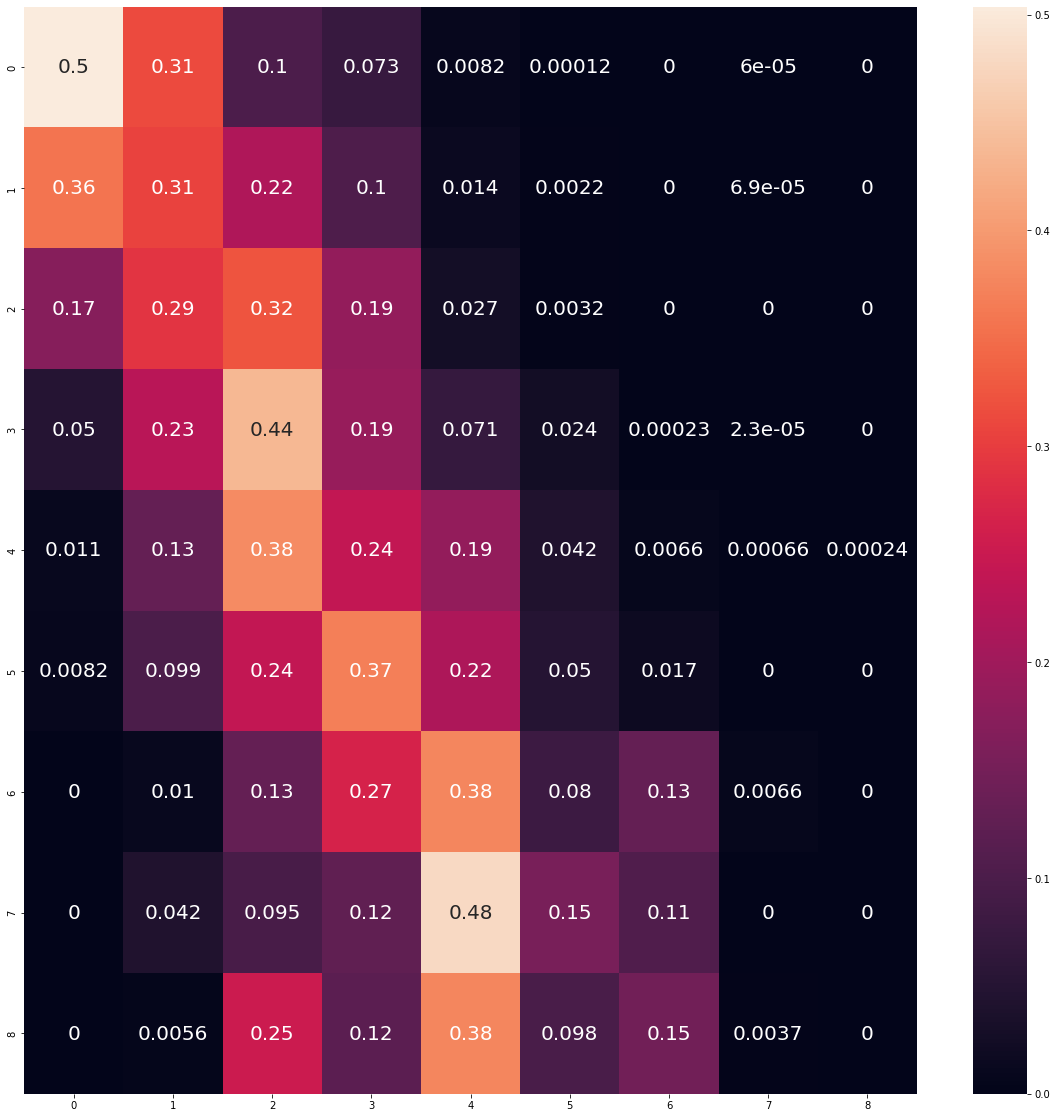

In [196]:
test_model(model,Test,Y_Test,True)